## Тема “Обучение без учителя”

##### Задание 1

* Импортируйте библиотеки pandas, numpy и matplotlib.
* Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
* Создайте датафреймы X и y из этих данных.
* Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
* Масштабируйте данные с помощью StandardScaler.
* Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
* Постройте диаграмму рассеяния на этих данных.


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [145]:
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split


Загружаем датасет (сделал и для Бостона и для Калифорнии)

In [146]:
boston = load_boston()
california = fetch_california_housing()

df = boston["data"]
data = california['data']

In [147]:
df
# data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Разобьем датасет на целеую переменную y и набор признаков X

In [148]:
X = pd.DataFrame(df, columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

X1 = pd.DataFrame(data, columns=california["feature_names"])
y1 = pd.DataFrame(california["target"], columns=['MedHouseVal'])

Определим тренировочную и тестовую выборки. На тест отдадим 20% данных

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [150]:
X_train.head(5)

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28

Стандартизируем данные с помощью StandartScaler()

In [151]:
scaler = StandardScaler()

X_train_sca = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_sca = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


X1_train_sca = pd.DataFrame(scaler.fit_transform(X1_train), columns=X1_train.columns)
X1_test_sca = pd.DataFrame(scaler.fit_transform(X1_test), columns=X1_test.columns)


In [152]:
X_train.head(5)

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28

Применим модель TSNE на тренировочных данных

In [153]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_sca)

print('БОСТОН')
print(f'Число признаков ДО применения TSNE: {X_train_sca.shape}')
print(f'Число признаков ПОСЛЕ применения TSNE: {X_train_tsne.shape}')

X1_train_tsne = tsne.fit_transform(X1_train_sca)

print('КАЛИФОРНИЯ')
print(f'Число признаков ДО применения TSNE: {X1_train_sca.shape}')
print(f'Число признаков ПОСЛЕ применения TSNE: {X1_train_tsne.shape}')



БОСТОН
Число признаков ДО применения TSNE: (404, 13)
Число признаков ПОСЛЕ применения TSNE: (404, 2)
КАЛИФОРНИЯ
Число признаков ДО применения TSNE: (16512, 8)
Число признаков ПОСЛЕ применения TSNE: (16512, 2)


Визуализируем данные

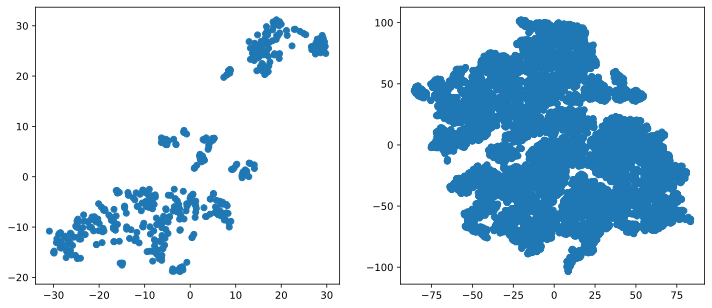

In [154]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.subplot(122)
plt.scatter(X1_train_tsne[:, 0], X1_train_tsne[:, 1])

plt.show()

Вывод (БОСТОН): по первому графику данные разделены на 3 группы

Вывод (КАЛИФОРНИЯ): по второму графику все данные находятся примерно в одном кластере, но есть небольшой "просвет", по которому их можно разбить на две прилегающие друг к другу группы

##### Задание 2

* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
* Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
* Вычислите средние значения price и CRIM в разных кластерах

Разобьем наши данные на 3 кластера

In [155]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_tsne)
labels_train1 = kmeans.fit_predict(X1_train_tsne)


In [156]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.subplot(122)
plt.scatter(X1_train_tsne[:, 0], X1_train_tsne[:, 1], c=labels_train1)

plt.show()

БОСТОН: Посмотрим средние значения price (цены) в разных кластерах

In [157]:
print(f'Среднее значение "price" по всей выборке: {y_train.mean()[0]}')
print(f'Среднее значение "price" в кластере 1: {y_train[labels_train == 0].mean()[0]}')
print(f'Среднее значение "price" в кластере 2: {y_train[labels_train == 1].mean()[0]}')
print(f'Среднее значение "price" в кластере 3: {y_train[labels_train == 2].mean()[0]}')

Среднее значение "price" по всей выборке: 22.796534653465343
Среднее значение "price" в кластере 1: 20.47076923076923
Среднее значение "price" в кластере 2: 16.277227722772277
Среднее значение "price" в кластере 3: 28.350289017341044


БОСТОН: Посмотрим средние значения CRIM (преступности) в разных кластерах

In [158]:
print(f'Среднее значение "CRIM" по всей выборке: {X_train["CRIM"].mean()}')
print(f'Среднее значение "CRIM" в кластере 1: {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Среднее значение "CRIM" в кластере 2: {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Среднее значение "CRIM" в кластере 3: {X_train["CRIM"][labels_train == 2].mean()}')

Среднее значение "CRIM" по всей выборке: 3.6091246287128715
Среднее значение "CRIM" в кластере 1: 0.7839846153846154
Среднее значение "CRIM" в кластере 2: 13.17982178217822
Среднее значение "CRIM" в кластере 3: 0.14454537572254336


Вывод (БОСТОН): чем выше значение преступности в кластере, тем ниже цена на квартиры в этом кластере

КАЛИФОРНИЯ: Посмотрим средние значения целевой переменной MedHouseVal (цена дома) в разных кластерах

In [159]:
print(f'Среднее значение "MedHouseVal" по всей выборке: {y1_train.mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 1: {y1_train[labels_train1 == 0].mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 2: {y1_train[labels_train1 == 1].mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 3: {y1_train[labels_train1 == 2].mean()[0]}')

Среднее значение "MedHouseVal" по всей выборке: 2.071946937378876
Среднее значение "MedHouseVal" в кластере 1: 1.9381242505368648
Среднее значение "MedHouseVal" в кластере 2: 1.714875040408337
Среднее значение "MedHouseVal" в кластере 3: 2.6136471502590672


КАЛИФОРНИЯ: Посмотрим на средние значения наиболее важного показателя среди набора признаков MedInc (медианный доход)

In [160]:
print(f'Среднее значение "MedInc" по всей выборке: {X1_train["MedInc"].mean()}')
print(f'Среднее значение "MedInc" в кластере 1: {X1_train["MedInc"][labels_train1 == 0].mean()}')
print(f'Среднее значение "MedInc" в кластере 2: {X1_train["MedInc"][labels_train1 == 1].mean()}')
print(f'Среднее значение "MedInc" в кластере 3: {X1_train["MedInc"][labels_train1 == 2].mean()}')

Среднее значение "MedInc" по всей выборке: 3.88075425750969
Среднее значение "MedInc" в кластере 1: 3.7802274158911957
Среднее значение "MedInc" в кластере 2: 2.833981199489579
Среднее значение "MedInc" в кластере 3: 5.046372269430052


Вывод (КАЛИФОРНИЯ): чем выше медианных доход, тем больше цена на квартиру

##### *Задание 3 (ПО КАЛИФОРНИИ)

* Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
* Вычислите средние значения MedHouseVal и MedInc в разных кластерах на тестовых данных

In [161]:
X1_test_tsne = tsne.fit_transform(X1_test_sca)

clusters =  kmeans.predict(X1_test_tsne)

clusters

array([2, 2, 2, ..., 1, 2, 0])

In [162]:
print(f'Среднее значение "MedHouseVal" по всей выборке: {y1_test.mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 1: {y1_test[clusters == 0].mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 2: {y1_test[clusters == 1].mean()[0]}')
print(f'Среднее значение "MedHouseVal" в кластере 3: {y1_test[clusters == 2].mean()[0]}')

Среднее значение "MedHouseVal" по всей выборке: 2.0550030959302323
Среднее значение "MedHouseVal" в кластере 1: 2.2275637292400603
Среднее значение "MedHouseVal" в кластере 2: 2.2156232785087715
Среднее значение "MedHouseVal" в кластере 3: 1.6568227990235966


In [163]:
print(f'Среднее значение "MedInc" по всей выборке: {X1_test["MedInc"].mean()}')
print(f'Среднее значение "MedInc" в кластере 1: {X1_test["MedInc"][clusters == 0].mean()}')
print(f'Среднее значение "MedInc" в кластере 2: {X1_test["MedInc"][clusters == 1].mean()}')
print(f'Среднее значение "MedInc" в кластере 3: {X1_test["MedInc"][clusters == 2].mean()}')

Среднее значение "MedInc" по всей выборке: 3.8303379844961243
Среднее значение "MedInc" в кластере 1: 3.9736159536990434
Среднее значение "MedInc" в кластере 2: 4.49277774122807
Среднее значение "MedInc" в кластере 3: 3.1071171684296175
